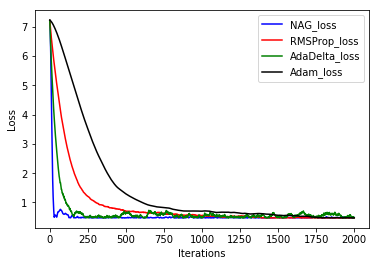

In [2]:
# write your code here
# -*- coding: utf-8 -*-

from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

#获取数据
def get_data(f):
    data = load_svmlight_file(f,123)
    return data[0], data[1]

#定义sigmoid函数
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

#NAG
def SGD_NAG(x_train, y_train, x_test, y_test, alpha, r, W, b, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    temp = np.ones((x_test.shape[0], 1))
    vw = np.zeros((123, 1))
    vb = 0
    loss = []
    L = 0.5 * np.dot(W.transpose(), W)
    temp0 = (1 - y_test * (X_test * W + b)).clip(0)
    L = L + np.dot(temp0.transpose(), temp)
    loss.append(L[0, 0]/X_test.shape[0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        if y_train[randIndex, 0] * (X_train[randIndex, :] * W + b)[0,0] < 1:
            #计算梯度
            G_w = (W - vw) - C * (X_train[randIndex, :].T * y_train[randIndex, :])
            G_b = -C * y_train[randIndex, 0]
        else:
            G_w = W
            G_b = 0
        #更新动量
        vw = r * vw + alpha * G_w
        vb = r * vb + alpha * G_b
        #更新参数
        W = W - vw
        b = b - vb
        
        L = 0.5 * np.dot(W.transpose(), W)
        temp0 = (1 - y_test * (X_test * W + b)).clip(0)
        L = L + np.dot(temp0.transpose(), temp)
        loss.append(L[0, 0]/X_test.shape[0])
    return W, b, loss

#RMSProp
def SGD_RMSProp(x_train, y_train, x_test, y_test, alpha, r, W, b, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G_w = np.zeros((123, 1))
    G_b = 0
    temp = np.ones((x_test.shape[0], 1))
    loss = []
    L = 0.5 * np.dot(W.transpose(), W)
    temp0 = (1 - y_test * (X_test * W + b)).clip(0)
    L = L + np.dot(temp0.transpose(), temp)
    loss.append(L[0, 0]/X_test.shape[0])
    

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        if y_train[randIndex, 0] * (X_train[randIndex, :] * W + b)[0,0] < 1:
            #计算梯度
            g_w = W - C * (X_train[randIndex, :].T * y_train[randIndex, :])
            g_b = -C * y_train[randIndex, 0]
        else:
            g_w = W
            g_b = 0
        G_w = r * G_w + (1 - r) * (g_w * g_w)
        G_b = r * G_b + (1 - r) * (g_b * g_b)
        #更新参数
        W = W - (alpha / np.sqrt(G_w + pow(1, -8))) * g_w
        b = b - (alpha / math.sqrt(G_b + pow(1, -8))) * g_b
        
        L = 0.5 * np.dot(W.transpose(), W)
        temp0 = (1 - y_test * (X_test * W + b)).clip(0)
        L = L + np.dot(temp0.transpose(), temp)
        loss.append(L[0, 0]/X_test.shape[0])  
    return W, b, loss

#AdaDelta
def SGD_AdaDelta(x_train, y_train, x_test, y_test, r, W, b, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G_w = np.zeros((123, 1))
    t_w = np.zeros((123, 1))
    e_w = np.zeros((123, 1))
    G_b = 0
    t_b = 0
    e_b = 0
    temp = np.ones((x_test.shape[0], 1))
    loss = []
    L = 0.5 * np.dot(W.transpose(), W)
    temp0 = (1 - y_test * (X_test * W + b)).clip(0)
    L = L + np.dot(temp0.transpose(), temp)
    loss.append(L[0, 0]/X_test.shape[0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        if y_train[randIndex, 0] * (X_train[randIndex, :] * W + b)[0,0] < 1:
            #计算梯度
            g_w = W - C * (X_train[randIndex, :].T * y_train[randIndex, :])
            g_b = -C * y_train[randIndex, 0]
        else:
            g_w = W
            g_b = 0
        G_w = r * G_w + (1 - r) * (g_w * g_w)
        e_w = -(np.sqrt(t_w + pow(1, -6)) / np.sqrt(G_w + pow(1, -6))) * g_w
        #更新参数
        W = W + e_w / 50
        t_w = r * t_w + (1 - r) * (e_w * e_w)
        G_b = r * G_b + (1 - r) * (g_b * g_b)
        e_b = -(np.sqrt(t_b + pow(1, -6)) / np.sqrt(G_b + pow(1, -6))) * g_b
        #更新参数
        W = W + e_b / 50
        t_b = r * t_b + (1 - r) * (e_b * e_b)
        
        L = 0.5 * np.dot(W.transpose(), W)
        temp0 = (1 - y_test * (X_test * W + b)).clip(0)
        L = L + np.dot(temp0.transpose(), temp)
        loss.append(L[0, 0]/X_test.shape[0])  
    return W, b, loss

#Adam
def SGD_Adam(x_train, y_train, x_test, y_test, alpha, r, B, W, b, maxIterations):
    m, n = x_test.shape
    M, N = x_train.shape
    G_w = np.zeros((123, 1))
    G_b = 0
    temp = np.ones((x_test.shape[0], 1))
    mom_w = np.zeros((123, 1))
    mom_b = 0
    loss = []
    a = 0
    L = 0.5 * np.dot(W.transpose(), W)
    temp0 = (1 - y_test * (X_test * W + b)).clip(0)
    L = L + np.dot(temp0.transpose(), temp)
    loss.append(L[0, 0]/X_test.shape[0])

    for i in range(maxIterations):
        #产生随机索引
        randIndex = int(random.uniform(0, M-1))
        if y_train[randIndex, 0] * (X_train[randIndex, :] * W + b)[0,0] < 1:
            #计算梯度
            g_w = W - C * (X_train[randIndex, :].T * y_train[randIndex, :])
            g_b = -C * y_train[randIndex, 0]
        else:
            g_w = W
            g_b = 0
        mom_w = B * mom_w + (1 - B) * g_w
        mom_b = B * mom_b + (1 - B) * g_b
        G_w = r * G_w + (1 - r) * (g_w * g_w)
        G_b = r * G_b + (1 - r) * (g_b * g_b)
        a = alpha * np.sqrt(1 - pow(r, i+1)) / (1 - pow(B, i+1))
        #更新参数
        W = W - a * (mom_w / np.sqrt(G_w + pow(1, -8)))
        b = b - a * (mom_b / np.sqrt(G_b + pow(1, -8)))
        
        L = 0.5 * np.dot(W.transpose(), W)
        temp0 = (1 - y_test * (X_test * W + b)).clip(0)
        L = L + np.dot(temp0.transpose(), temp)
        loss.append(L[0, 0]/X_test.shape[0])  
    return W, b, loss

#获取数据
X_train, y_train = get_data('G:\MLcode\data\\a9a.txt')
X_test, y_test = get_data('G:\MLcode\data\\a9a.t')
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

#随机初始化模型参数
W = np.random.rand(123, 1)
b = 0
C = 0.1

NAG_w, NAG_b, NAG_loss= SGD_NAG(X_train, y_train, X_test, y_test, 0.01, 0.9, W, b, 2000)
RMSProp_w, RMSProp_b, RMSProp_loss= SGD_RMSProp(X_train, y_train, X_test, y_test, 0.01, 0.9, W, b, 2000)
AdaDelta_w, AdaDelta_b, AdaDelta_loss= SGD_AdaDelta(X_train, y_train, X_test, y_test, 0.95, W, b, 2000)
Adam_w, Adam_b, Adam_loss= SGD_Adam(X_train, y_train, X_test, y_test, 0.01, 0.999, 0.9, W, b, 2000)

plt.xlabel('Iterations')
plt.ylabel('Loss')
a, = plt.plot(NAG_loss, color = 'blue')
b, = plt.plot(RMSProp_loss, color = 'red')
c, = plt.plot(AdaDelta_loss, color = 'green')
d, = plt.plot(Adam_loss, color = 'black')
plt.legend(handles = [a, b, c, d], labels = ['NAG_loss', 'RMSProp_loss', 'AdaDelta_loss', 'Adam_loss'], loc = 'best')
plt.show()